<a href="https://colab.research.google.com/github/kaybrian/Mnist/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
BUFFER_SIZE = 70_000
BATCH_SIZE = 128
NUM_EPOCHS = 20

In [3]:
mnist_dataset, mnist_info = tfds.load(name="mnist", with_info=True, as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
print(mnist_dataset)

{'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, 'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [5]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [6]:
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.

  return image, label



In [7]:
tain_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [8]:
num_validation_sample = 0.1 * mnist_info.splits['train'].num_examples
num_validation_sample = tf.cast(num_validation_sample, tf.int64)

In [10]:
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [11]:
tain_validation_data = tain_validation_data.shuffle(BUFFER_SIZE)

In [12]:
train_data = tain_validation_data.skip(num_validation_sample)
validation_data = tain_validation_data.take(num_validation_sample)

In [13]:
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_test_samples)
test_data = test_data.batch(num_test_samples)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, 5, activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(50, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

In [16]:
model.summary(line_length=74)

Model: "sequential"
__________________________________________________________________________
 Layer (type)                    Output Shape                 Param #     
 conv2d_2 (Conv2D)               (None, 24, 24, 50)           1300        
                                                                          
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 50)           0           
                                                                          
 conv2d_3 (Conv2D)               (None, 10, 10, 50)           22550       
                                                                          
 max_pooling2d_3 (MaxPooling2D)  (None, 5, 5, 50)             0           
                                                                          
 flatten (Flatten)               (None, 1250)                 0           
                                                                          
 dense (Dense)                   (None, 10)                   12510       
     

In [24]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [26]:
early_spotting = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    mode="auto",
    min_delta = 0,
    patience=2,
    verbose=0,
    restore_best_weights = True
)

In [27]:
model.fit(
    train_data,
    epochs=NUM_EPOCHS,
    callbacks=[early_spotting],
    validation_data = validation_data,
    verbose=2
)

Epoch 1/20
422/422 - 60s - loss: 0.2660 - accuracy: 0.9223 - val_loss: 0.0881 - val_accuracy: 0.9725 - 60s/epoch - 143ms/step
Epoch 2/20
422/422 - 56s - loss: 0.0745 - accuracy: 0.9776 - val_loss: 0.0518 - val_accuracy: 0.9837 - 56s/epoch - 133ms/step
Epoch 3/20
422/422 - 56s - loss: 0.0547 - accuracy: 0.9841 - val_loss: 0.0449 - val_accuracy: 0.9848 - 56s/epoch - 133ms/step
Epoch 4/20
422/422 - 56s - loss: 0.0462 - accuracy: 0.9864 - val_loss: 0.0411 - val_accuracy: 0.9873 - 56s/epoch - 132ms/step
Epoch 5/20
422/422 - 56s - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.0356 - val_accuracy: 0.9900 - 56s/epoch - 133ms/step
Epoch 6/20
422/422 - 55s - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0292 - val_accuracy: 0.9903 - 55s/epoch - 129ms/step
Epoch 7/20
422/422 - 57s - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0341 - val_accuracy: 0.9885 - 57s/epoch - 135ms/step
Epoch 8/20
422/422 - 56s - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0174 - val_accuracy: 0.9945 - 56s/epoch - 132

In [30]:
# testing the model.
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 4s 4s/step - loss: 0.0280 - accuracy: 0.9913


In [33]:

print(f'Test loss: {test_loss* 100:.4f}% and Test Acuracy: {test_accuracy* 100:.4f}')

Test loss: 2.8014% and Test Acuracy: 99.1300


In [34]:
# plotting the results now

In [35]:
import matplotlib.pyplot as plt
import numpy as np


In [36]:
for images, labels in test_data.take(1):
  images_test = images.numpy()
  labels_test = labels.numpy()

images_plot = np.reshape(images_test, (10000, 28, 28))


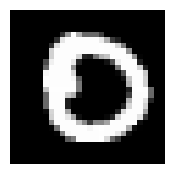

label : 0


In [51]:
i = 2
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(images_plot[i-1], cmap="gray", aspect="auto")
plt.show()

# print the label
print(f'label : {labels_test[i-1]}')

1/1 [==============================] - 0s 26ms/step
[[ 17.93839    -26.759165     2.9891367  -18.86996    -28.331121
   -1.8924025    1.8962777  -13.272929     0.19126134  -1.508679  ]]


<BarContainer object of 10 artists>

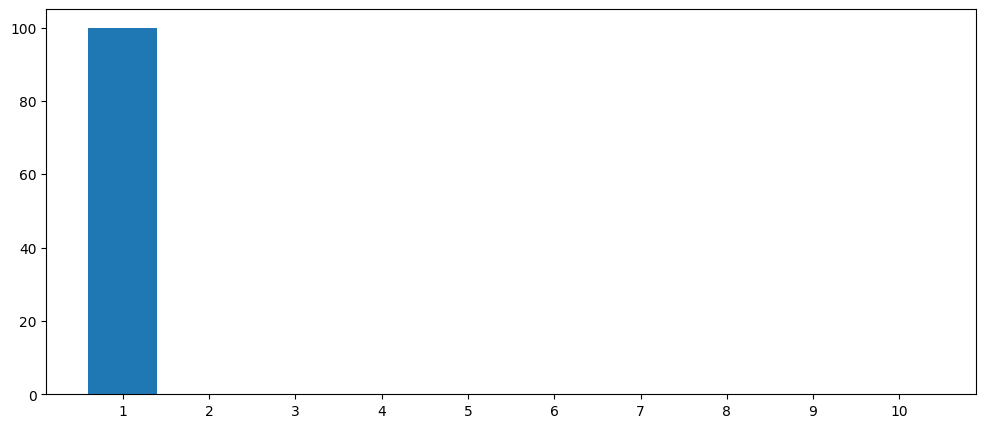

In [57]:
#  model predictions
predictions = model.predict(images_test[i-1: i])
print(predictions)

probabilities = tf.nn.softmax(predictions).numpy()

probabilities = probabilities * 100

plt.figure(figsize=(12,5))

plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=probabilities[0], tick_label=['1','2','3','4','5','6','7','8','9','10'])